# Real-World Project: Orange Telecom Churn Prevention and Prediction
### The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models.

## 1.1 Data Exploration

In [22]:
#Reading Data into Pandas DataFrame
import pandas as pd

df = pd.read_csv('churn-train.csv')

In [23]:
df.info()  # we see that we have 2666 observations and no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [24]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  2666
Columns  :  20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values :   0

Unique values :  
 State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls         

## 1.2 Variable Breakdown
  
**STATE**: 51 Unique States in United States of America
  
**Account Length**. Length of The Account

**Area Code** 415 relates to San Francisco,408 is  of San Jose and 510 is of City of Okland 

**International Plan**  Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan**  Yes Indicates Voice Mail  Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages** Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes**  Total Number of Minutes Spent By Customers in Morning

**Total  day calls** Total Number of Calls made by Customer in Morning.

**Total day charge** Total Charge to the Customers in Morning.

**Total eve minutes**Total Number of Minutes Spent By Customers in Evening

**Total eve calls** Total Number of Calls made by Customer in Evening.

**Total eve charge**  Total Charge to the Customers in Morning.

**Total night minutes**  Total Number of Minutes Spent By Customers in the Night.

**Total night calls**   Total Number of Calls made by Customer in Night.

**Total night charge** Total Charge to the Customers in Night.

## 1.3 Checking the Churn Rate

In [25]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

#### This is a Highly-Imbalanced Dataset,Hence we need to use SMOTE techniques for such a data.

In [26]:
#Separating churn and non churn customers
churn     = df[df["Churn"] == bool(True)]
not_churn = df[df["Churn"] == bool(False)]

In [27]:
#Dropping Account Length as it doesnt make a sense here
df = df.drop('Account length',axis=1)

In [28]:
#Area Code
df['Area code'].unique()

array([415, 408, 510])

In [29]:
#Replacing Yes/No values with 1 and 0
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

## 1.4 Checking Voice-Mail Feature

In [30]:
#Voice-Mail Feautre Messages
print('Unique vmail messages',df['Number vmail messages'].unique())
df['Number vmail messages'].describe()

Unique vmail messages [25 26  0 24 37 27 33 39 41 28 30 34 46 35 21 42 36 22 23 43 31 38 40 29
 18 32 17 45 16 14 20 19 15 12 47  8 44  4 10 13 50  9]


count    2666.000000
mean        8.021755
std        13.612277
min         0.000000
25%         0.000000
50%         0.000000
75%        19.000000
max        50.000000
Name: Number vmail messages, dtype: float64

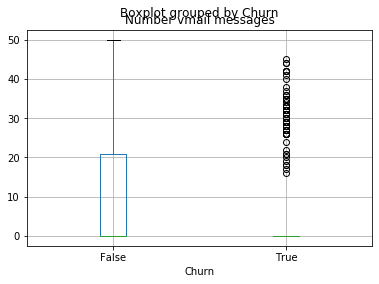

In [31]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Number vmail messages', by='Churn')


#### We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.
#### According to my hypothesis :
  ***1.Voice-Mail Service Upgradation
  2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails.
  3.Quality Drop in Voice-Mail after 25 voice mails.****

## 1.5  Total-Minutes in Morning Affecting the Churn Rate

In [32]:
print('Maximum number of minutes:',df['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].max()/60))
print('Maximum number of minutes:',df['Total day minutes'].min())
print('Average number of minutes:',df['Total day minutes'].mean())

Maximum number of minutes: 350.8 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 179.48162040510135


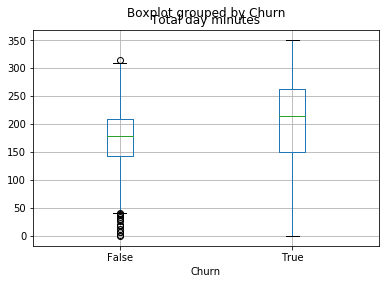

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Total day minutes', by='Churn')


#### We can infer from above box-plot that with users spending more 225 minutes or more i.e. approx 4hrs tend to switch to other operator.
<b>According to my hypothesis, following would be the factors that should be implemented:
    <li>1.Network Disturbance during a Call
    <li>2.Cracking sound or noise during a call
    <li>3.Need to Upgrade or make smarter use of technologies like VoLTE to improve Voice Quality.
    <li>4. Network Upgradation

In [34]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 160
Minimum number of calls: 0
Average number of calls: 100.31020255063765


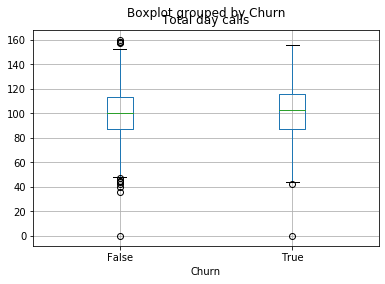

In [35]:

plt.show()
df.boxplot(column='Total day calls', by='Churn')


#### We can infere here that on an average a 100 calls are made which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops which may lead to more calls in a morning.

In [36]:
print('Maximum number of charge:',df['Total day charge'].max())
print('Minimum number of charge:',df['Total day charge'].min())
print('Average number of charge:',df['Total day charge'].mean())

Maximum number of charge: 59.64
Minimum number of charge: 0.0
Average number of charge: 30.512404351087813


Average charge is around 30$ which is  a decent pricing strategy!

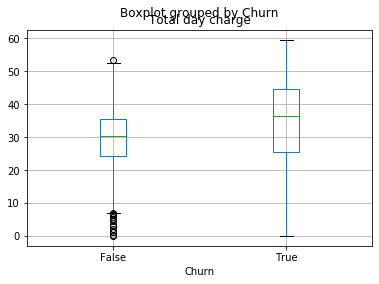

In [37]:
plt.show()
df.boxplot(column='Total day charge', by='Churn')


#### Well,Here we can clearly indicate a strategy a good strategy to be implemented. As from above infered box-plots we can conclude one thing i.e Customers having more minutes spent on the network tend to leave the it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company.
<b> According to my Hypothsis:
    <li>1.Startegy of pricing needs to be re-evaluated.
    <li> 2. The Clients who have high call minutes and calls need a discount in the end.
       

## 1.5 Evening time Affecting the Churn Rate!!

In [38]:
print('Maximum number of minutes:',df['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total eve minutes'].max()/60))
print('Maximum number of minutes:',df['Total eve minutes'].min())
print('Average number of minutes:',df['Total eve minutes'].mean())

Maximum number of minutes: 363.7 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 200.38615903976006


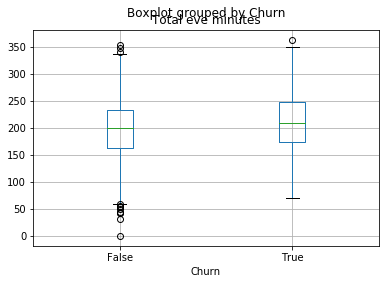

In [39]:
plt.show()
df.boxplot(column='Total eve minutes', by='Churn')


In [40]:
print('Maximum number of calls:',df['Total eve calls'].max())
print('Minimum number of calls:',df['Total eve calls'].min())
print('Average number of calls:',df['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.02363090772693


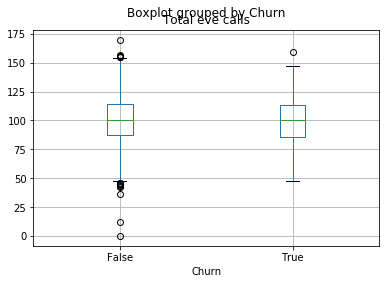

In [41]:

plt.show()
df.boxplot(column='Total eve calls', by='Churn')


In [42]:
print('Maximum number of charge:',df['Total eve charge'].max())
print('Minimum number of charge:',df['Total eve charge'].min())
print('Average number of charge:',df['Total eve charge'].mean())

Maximum number of charge: 30.91
Minimum number of charge: 0.0
Average number of charge: 17.033072018004518


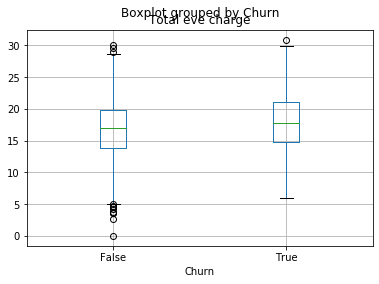

In [43]:
plt.show()
df.boxplot(column='Total eve charge', by='Churn')


## 1.6 Night Time Affecting Churn Rate !!

In [44]:
print('Maximum number of minutes:',df['Total night minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total night minutes'].max()/60))
print('Minimum number of minutes:',df['Total night minutes'].min())
print('Average number of minutes:',df['Total night minutes'].mean())

Maximum number of minutes: 395.0 i.e. Max number of Hours  spent: 7
Minimum number of minutes: 43.7
Average number of minutes: 201.16894223555968


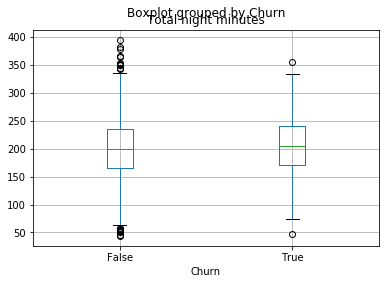

In [45]:
plt.show()
df.boxplot(column='Total night minutes', by='Churn')

#### In Night, The Loyal Customers are spend more time is what the box-plot indicates!

In [46]:
print('Maximum number of calls:',df['Total night calls'].max())
print('Minimum number of calls:',df['Total night calls'].min())
print('Average number of calls:',df['Total night calls'].mean())

Maximum number of calls: 166
Minimum number of calls: 33
Average number of calls: 100.10615153788447


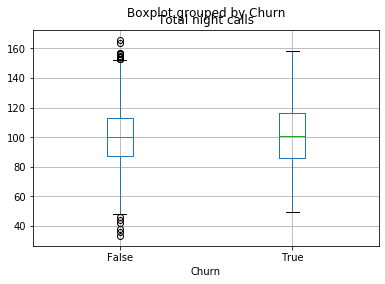

In [47]:
plt.show()
df.boxplot(column='Total night calls', by='Churn')

#### Still Calls are made more by the churned customers!!

In [48]:
print('Maximum number of charge:',df['Total night charge'].max())
print('Minimum number of charge:',df['Total night charge'].min())
print('Average number of charge:',df['Total night charge'].mean())

Maximum number of charge: 17.77
Minimum number of charge: 1.97
Average number of charge: 9.052689422355604


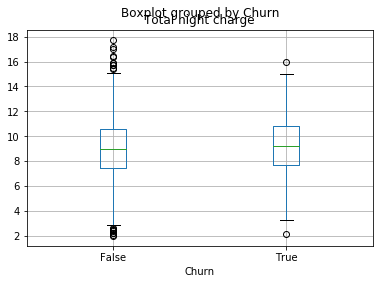

In [49]:
plt.show()
df.boxplot(column='Total night charge', by='Churn')

#### Again Optimization of The Charges would lead to a loyal customer!!!

## 1.7 International Calls Affecting the Churn Rate 

In [50]:
print('Maximum number of minutes:',df['Total intl minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total intl minutes'].max()/60))
print('Minimum number of minutes:',df['Total intl minutes'].min())
print('Average number of minutes:',df['Total intl minutes'].mean())

Maximum number of minutes: 20.0 i.e. Max number of Hours  spent: 0
Minimum number of minutes: 0.0
Average number of minutes: 10.23702175543886


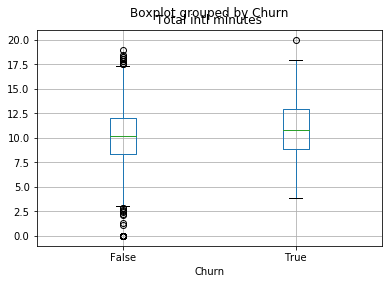

In [51]:
plt.show()
df.boxplot(column='Total intl minutes', by='Churn')


#### Users who make the International Call tend to spend more minutes.

In [52]:
print('Maximum number of calls:',df['Total intl calls'].max())
print('Minimum number of calls:',df['Total intl calls'].min())
print('Average number of calls:',df['Total intl calls'].mean())

Maximum number of calls: 20
Minimum number of calls: 0
Average number of calls: 4.467366841710428


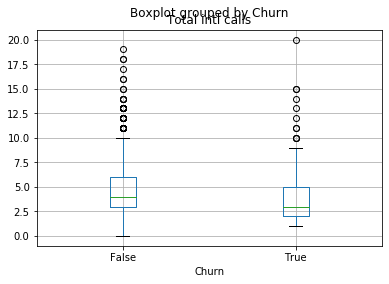

In [53]:
plt.show()
df.boxplot(column='Total intl calls', by='Churn')


#### These Calls clearly indicat that clients without International Plan Suffer and May Leave the Operator.

In [54]:
print('Maximum number of charge:',df['Total intl charge'].max())
print('Minimum number of charge:',df['Total intl charge'].min())
print('Average number of charge:',df['Total intl charge'].mean())

Maximum number of charge: 5.4
Minimum number of charge: 0.0
Average number of charge: 2.764489872468112


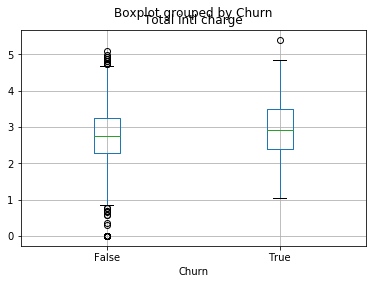

In [55]:
plt.show()
df.boxplot(column='Total intl charge', by='Churn')

### Different Pricing Strategy and International Calling Rate Optimization would lead to lower churn rate

## 1.8 Churn According to States

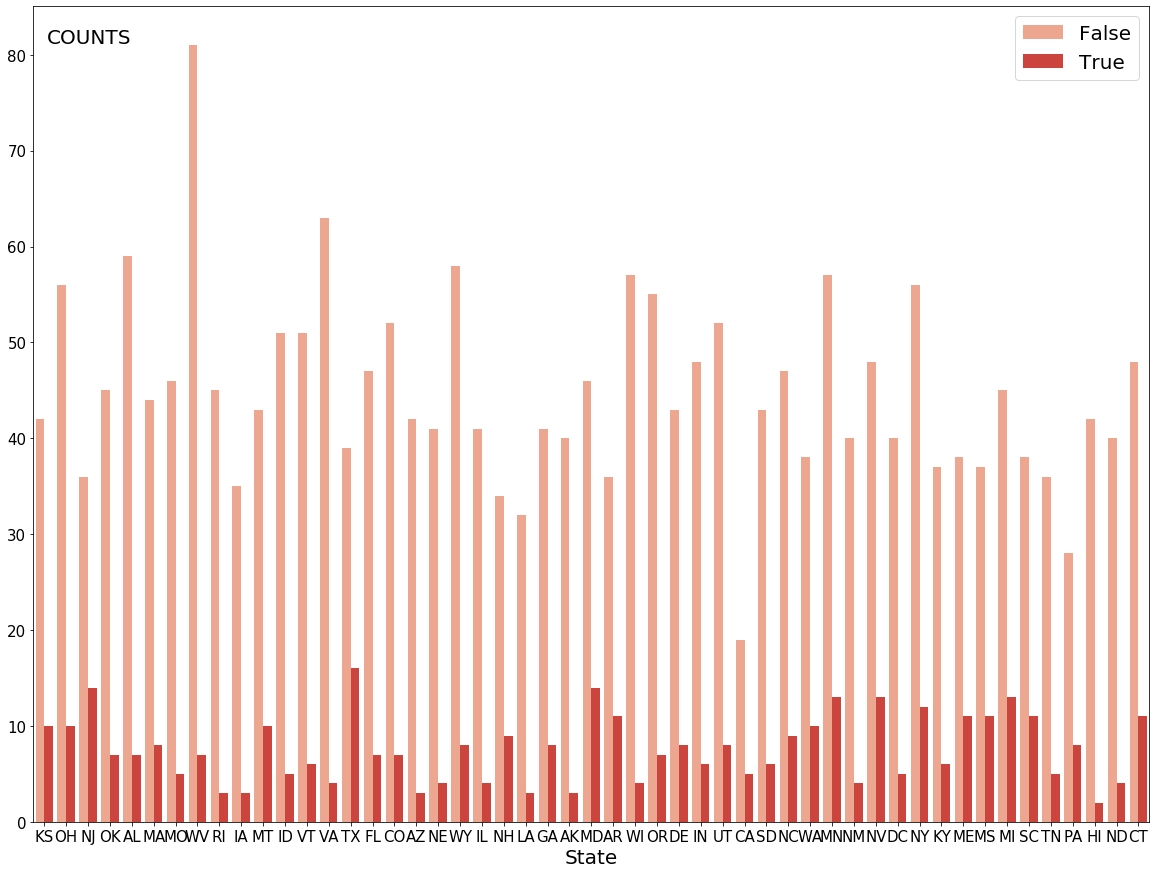

In [56]:
# By Age
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='State', hue='Churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

## Texas,Maryland have the bit more churn rate than usual, A Network Upgradation would be strongly suggested in these areas!.

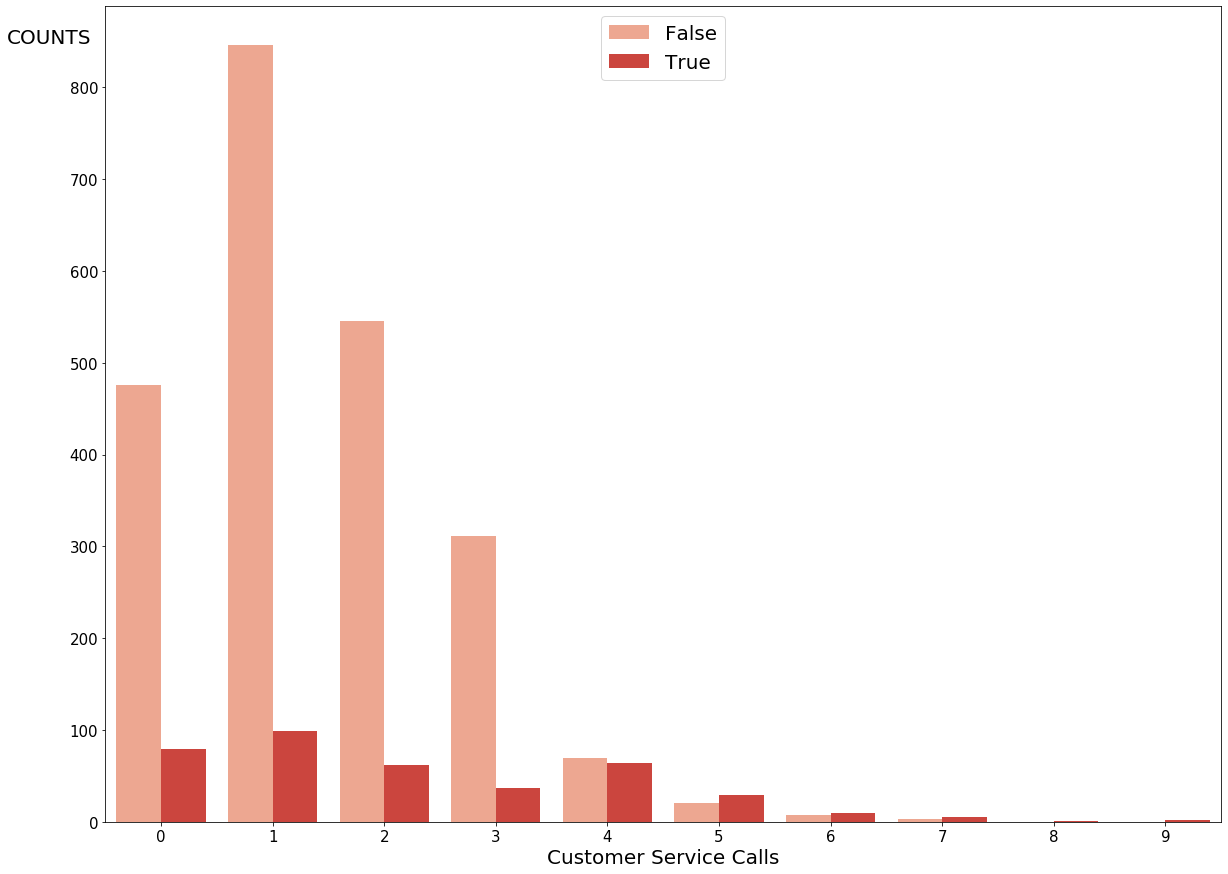

In [57]:
# Customer Calls
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('Customer Service Calls', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

#### While some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt.
<li><b>A Feedback is neccesary in such situations.
<li><b> It should given a Confirmation to the Customer that there issue would be solved in first attempt

In [58]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})

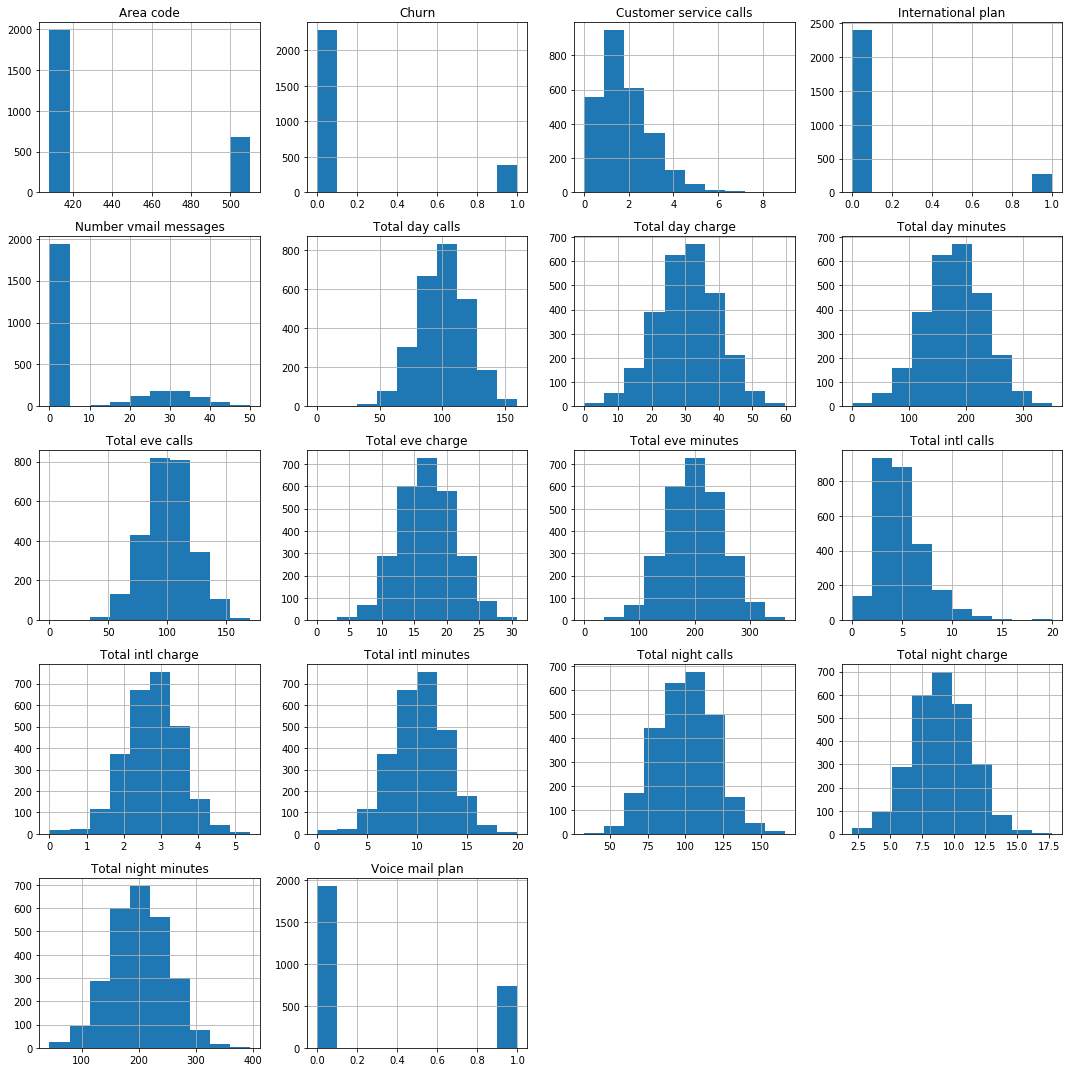

In [59]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

In [60]:
day_df = df[['Total day minutes','Total day calls','Total day minutes','Total day charge','Churn']]
eve_df = df[['Total eve minutes','Total eve calls','Total eve minutes','Total eve charge','Churn']]
night_df = df[['Total night minutes','Total night calls','Total night minutes','Total night charge','Churn']]
intl_df = df[['Total intl minutes','Total intl calls','Total intl minutes','Total intl charge','Churn']]

In [61]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

## 1.8 Data Correlation

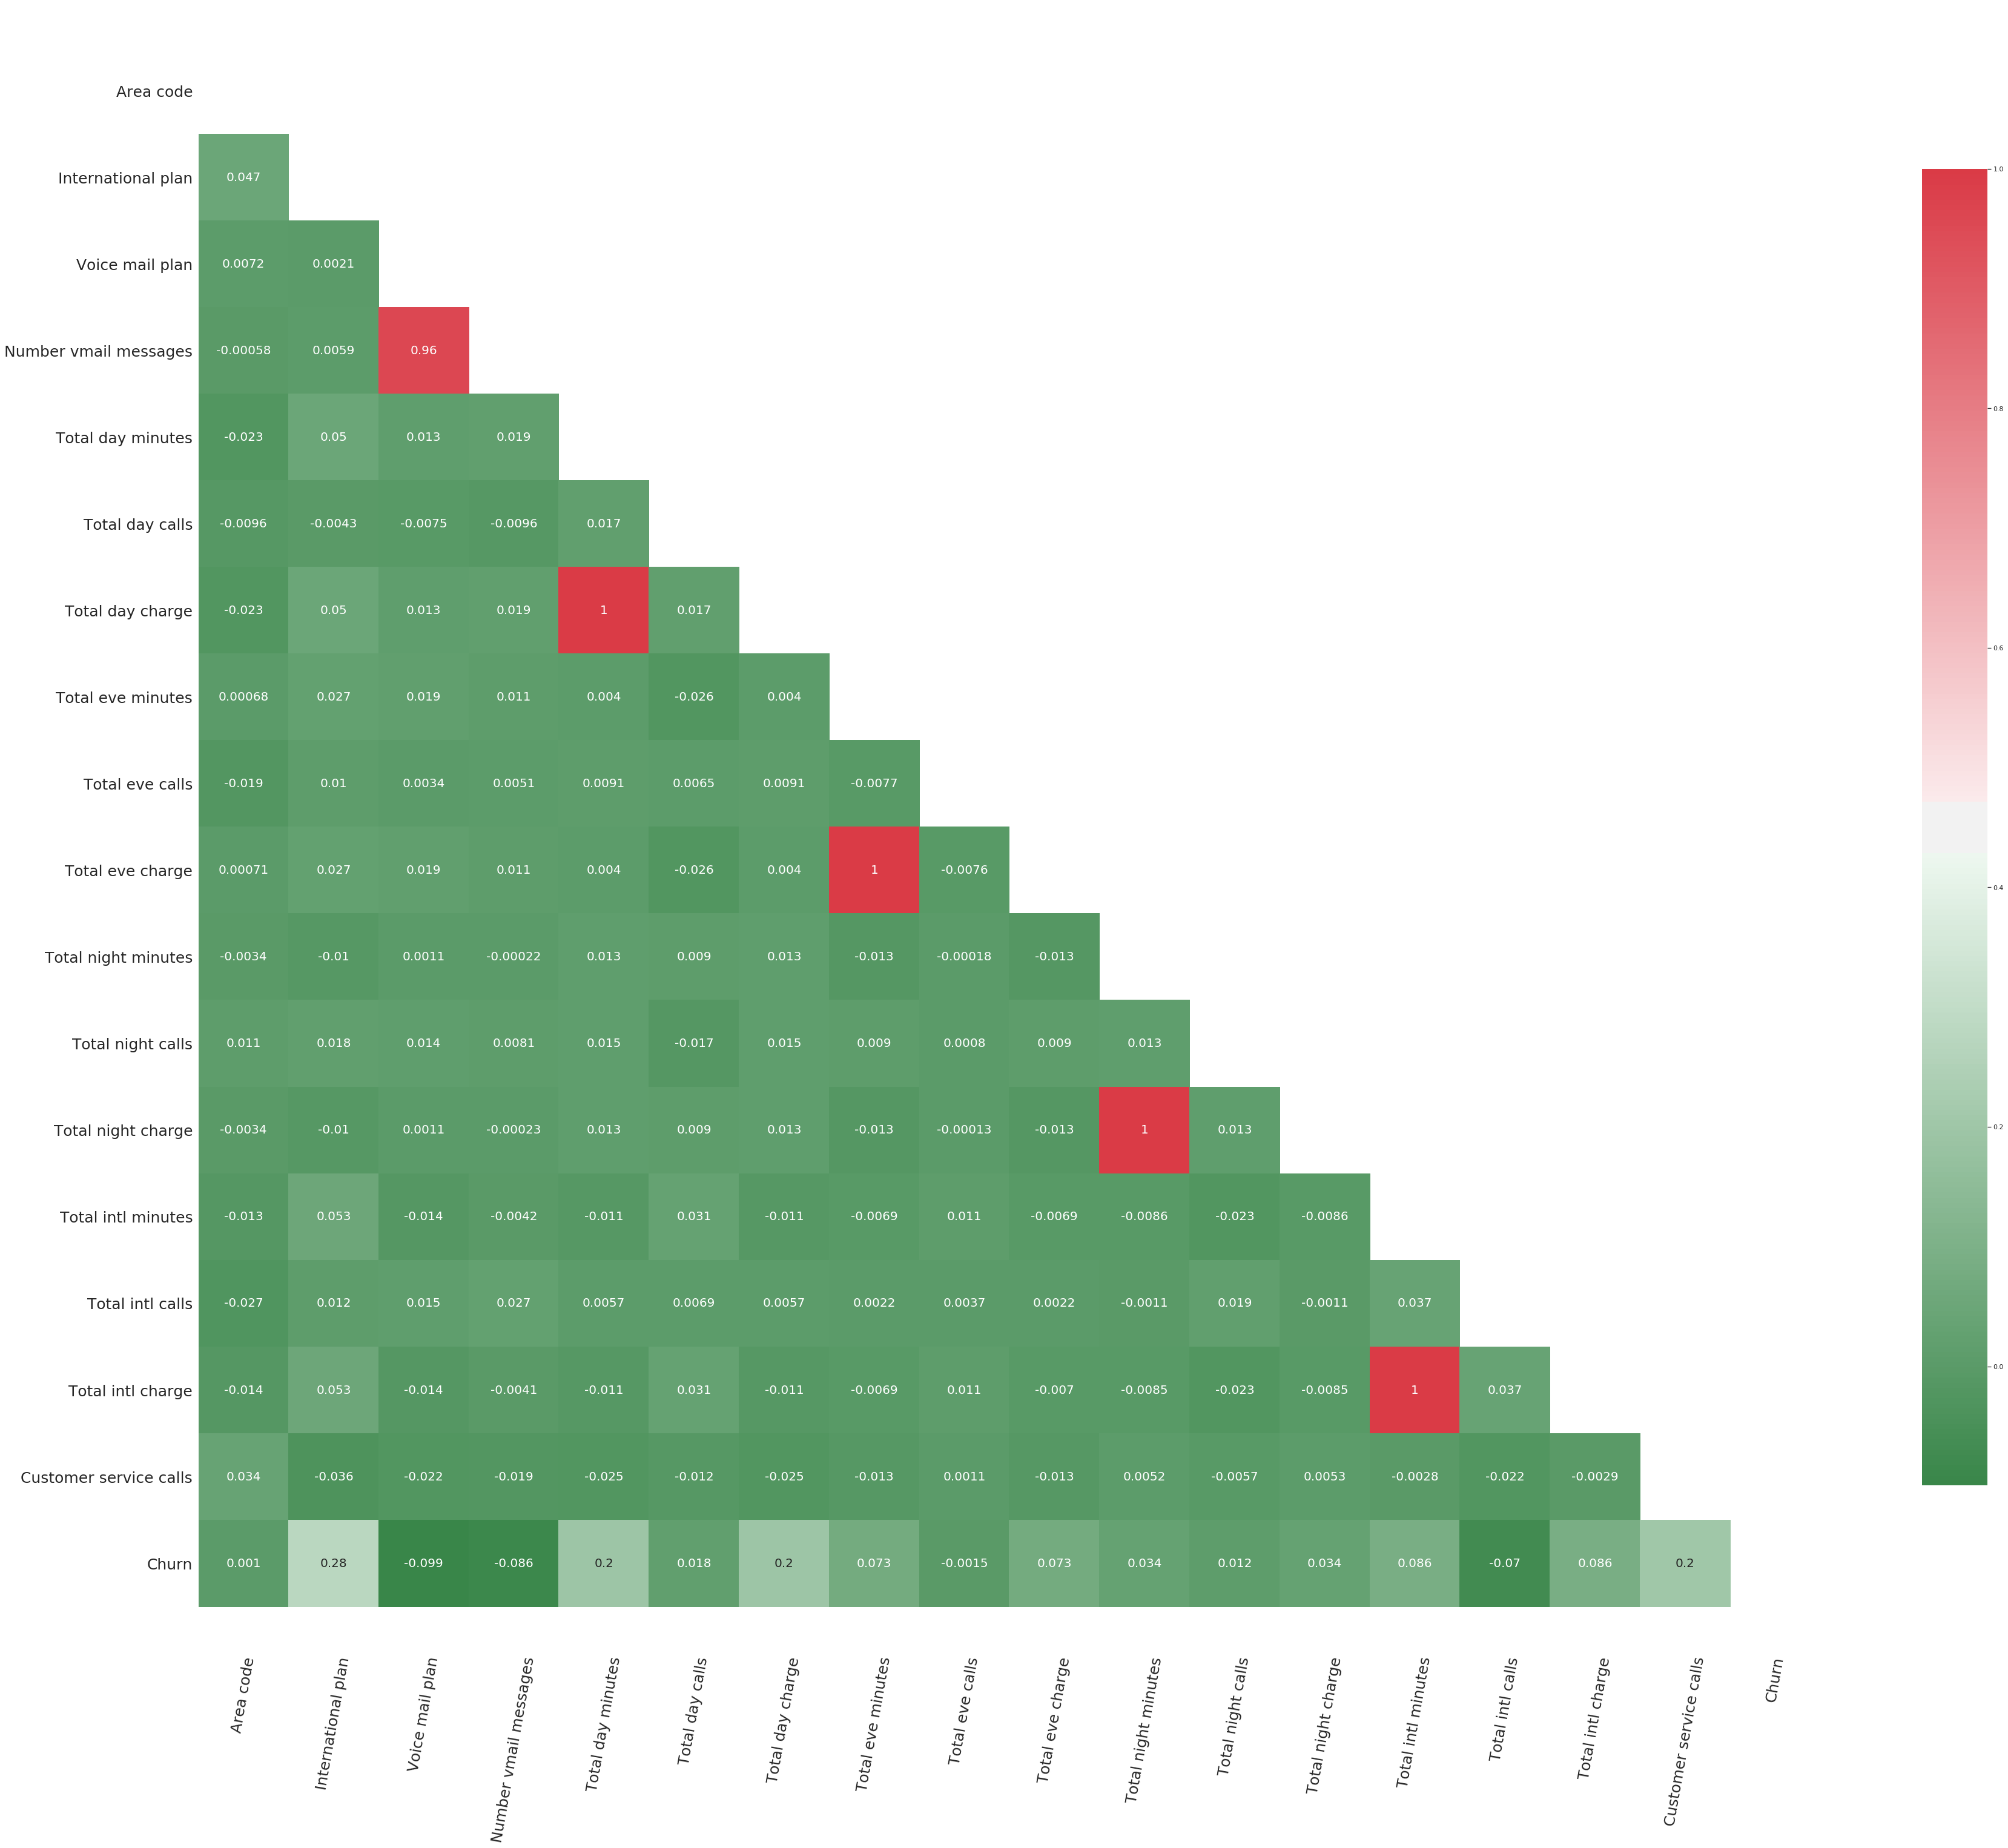

In [62]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10,
                      as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);



# Prediction

## 1.9 Training Our Model using Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.50      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.67      0.55      0.55       667
weighted avg       0.78      0.82      0.77       667

Accuracy   Score :  0.8200899550224887
Area under curve :  0.552041438147471 



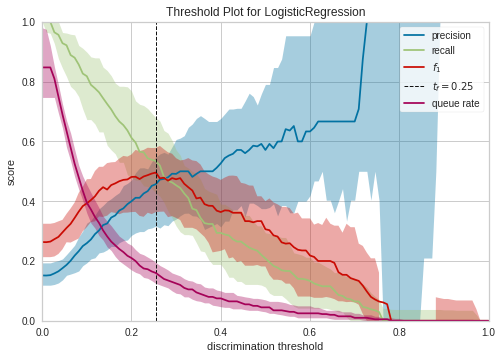

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)
X = df.drop(['State','Churn'],axis=1)
target_col = ['Churn']
##seperating dependent and independent variables
cols    = X.columns
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)



#### As Dataset is Highly-Imbalance we would like to Over Sample and check results

### SMOTE

Using TensorFlow backend.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       547
           1       0.34      0.65      0.45       120

    accuracy                           0.71       667
   macro avg       0.62      0.69      0.63       667
weighted avg       0.80      0.71      0.74       667

Accuracy   Score :  0.7106446776611695
Area under curve :  0.6869744058500915 



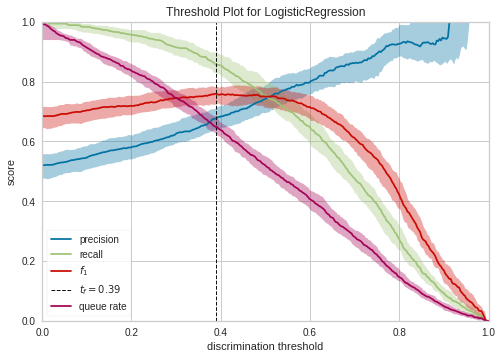

In [65]:
from imblearn.over_sampling import SMOTE


smote_X = df[cols]
smote_Y = df[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

#### Clearly SMOTE over sampling increase the recall which is our main metric to correctly predict the churned customer

### SMOTE and RFE and Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81       547
           1       0.35      0.66      0.46       120

    accuracy                           0.72       667
   macro avg       0.63      0.70      0.64       667
weighted avg       0.81      0.72      0.75       667

Accuracy   Score :  0.7211394302848576
Area under curve :  0.6966255332114564 



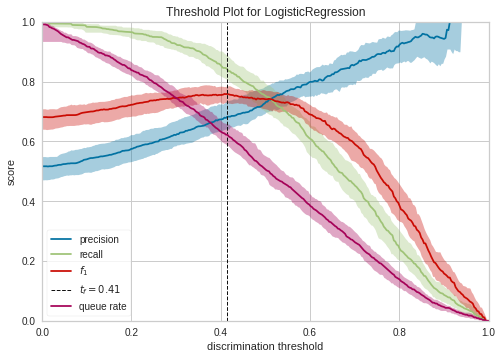

In [66]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : X.columns,
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

#### Applying SMOTE and Logistic Regression using RFE has good impact and gives us the ranking

## Checking the Scores with other Models and Choosing the Best One!

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

gnb = GaussianNB(priors=None)
svc_lin  = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=1.0, kernel='linear',
               max_iter=-1, probability=True, random_state=None, shrinking=True,
               tol=0.001, verbose=False)
svc_rbf  = SVC(C=1.0, kernel='rbf', 
               degree= 3, gamma=1.0, 
               coef0=0.0, shrinking=True,
               probability=True,tol=0.001,
               cache_size=200, class_weight=None,
               verbose=False,max_iter= -1,
               random_state=None)
from lightgbm import LGBMClassifier

lgbm_c = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                        learning_rate=0.5, max_depth=7, min_child_samples=20,
                        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
                        n_jobs=-1, num_leaves=500, objective='binary', random_state=None,
                        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
                        subsample_for_bin=200000, subsample_freq=0)
from xgboost import XGBClassifier

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
                    max_depth = 7, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    silent=True, subsample=1)
#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

#### Well no doubt, Boosting and Tree Based Perform Better and XGBoost is the best model to conclude it let's evaluate with other metrics

# 6. Model Performances
## 6.1. model performance metrics</a>

In [68]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### XGBoost is the best 

## Plotting Confusion Matrix of all models

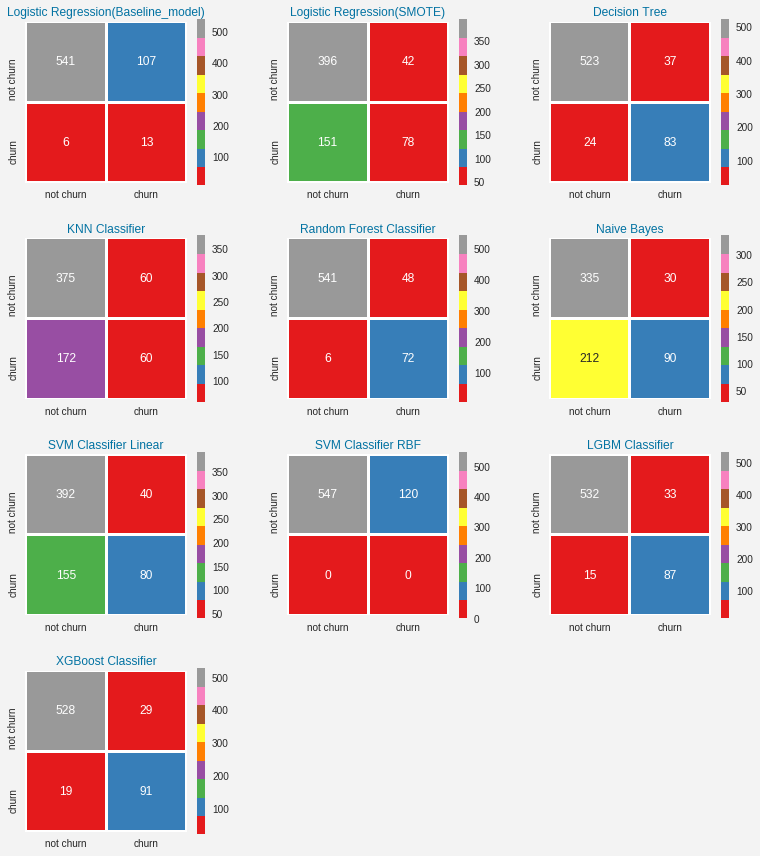

In [69]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

#### Well we want our model to predict churn customers correctly and XGBoost is exceptional to our metric evaluation

## Evaluating ROC Metric

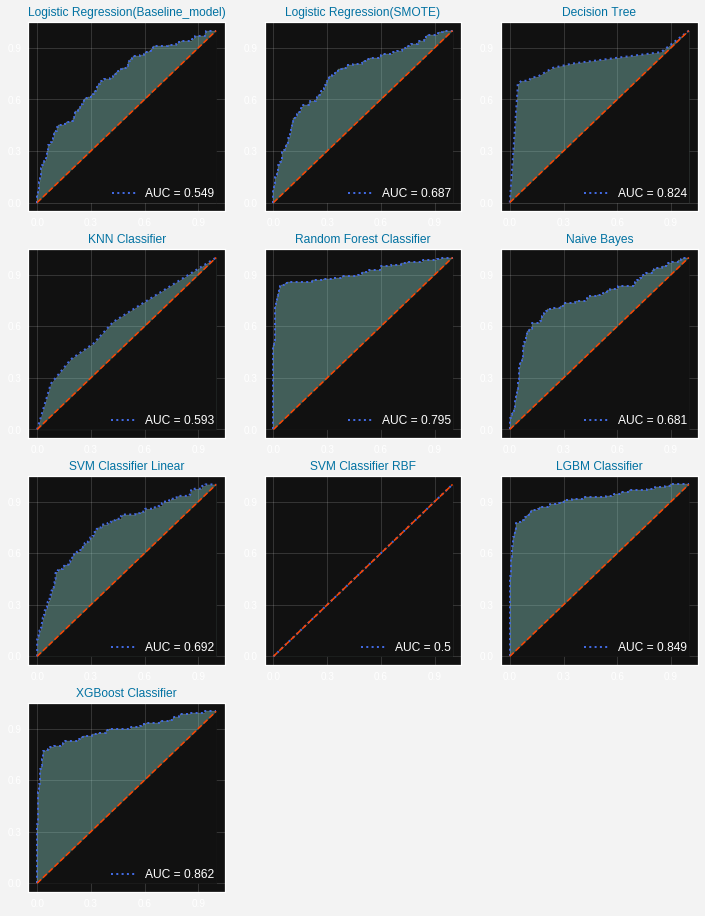

In [70]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## Precision Recall Curves

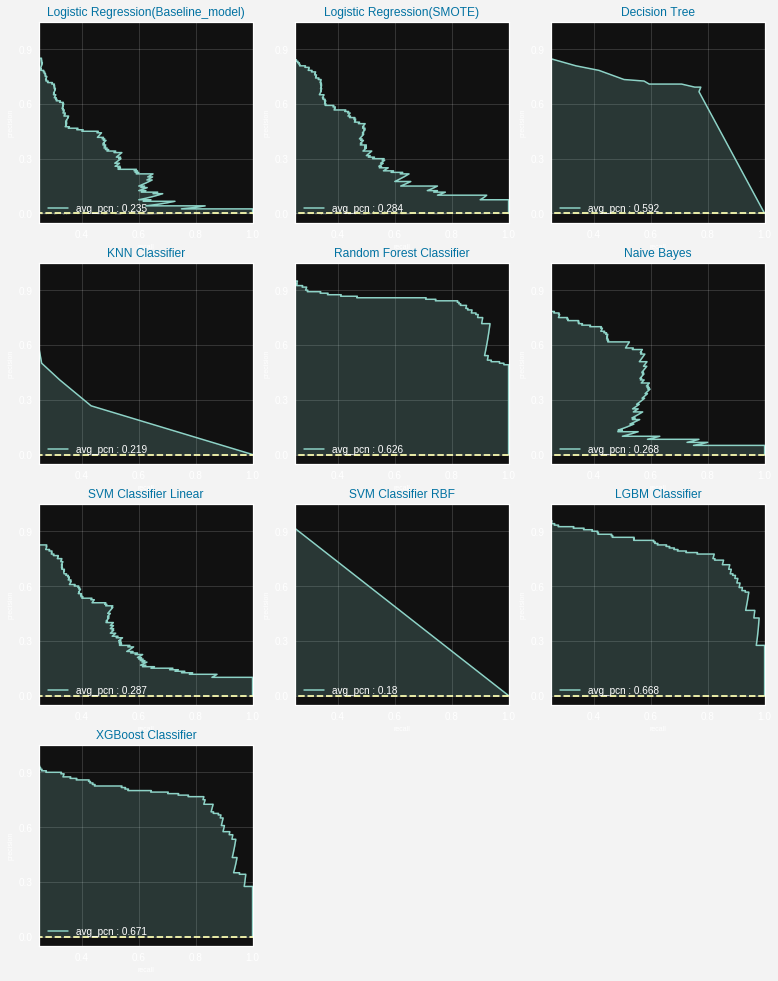

In [71]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))

# Conclusions
## We can definitely suggest to prevent churn :
<b><li> Upgrading network to improve services for long duration users.
  <b><li> Updating Pricing Strategies.
    <b><li>Updating and Optimizing Internationall Call Rates.
     <b><li> Implmenting a better network infrastructure in Maryland and Texas Areas where there is more Churn Rate.
      <b><li>Upgrading their services when in emegenvy only in evening period as low network traffic.<b>


## We can Predict using:
<b><li> If we want to predict churn rate  correctly, then Tree based classification using SMOTE would be recommended.
 <b><li> XGBoost Classifier Performs best and would be a recommended Model.


## Further for Improvement we can suggest and discuss more strategies to the company by collecting other data and through a domain expert!